In [1]:
import numpy as np
from urllib import request
import gzip


In [2]:
filename = [
["x_train", "train-images-idx3-ubyte.gz"],
["x_test", "t10k-images-idx3-ubyte.gz"],
["y_train", "train-labels-idx1-ubyte.gz"],
["y_test", "t10k-labels-idx1-ubyte.gz" ],
]

base_url = "http://yann.lecun.com/exdb/mnist/"
for n in filename:
    request.urlretrieve(base_url+n[1],n[1])
    print("%s downloaded " % base_url+n[1])

print("download has been completed.")

http://yann.lecun.com/exdb/mnist/ downloaded train-images-idx3-ubyte.gz
http://yann.lecun.com/exdb/mnist/ downloaded t10k-images-idx3-ubyte.gz
http://yann.lecun.com/exdb/mnist/ downloaded train-labels-idx1-ubyte.gz
http://yann.lecun.com/exdb/mnist/ downloaded t10k-labels-idx1-ubyte.gz
download has been completed.


In [3]:
# dictionary 에 'x_train', 'y_train', 'x_test', 'y_test' 라는 key 로 저장합니다.
mnist = {}

# train, test image 를 가져와서 dictionary 에 넣습니다.  x_train, y_train 에 넣습니다. 
for name in filename[:2]:
    with gzip.open(name[1], 'rb') as f:
        mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28,28)
        
for name in filename[2:]:
    with gzip.open(name[1], 'rb') as f:
        mnist[name[0]] = np.frombuffer(f.read(),np.uint8, offset=8).reshape(-1,1)

In [4]:
x_train, y_train, x_test, y_test = mnist['x_train'], mnist['y_train'], mnist['x_test'], mnist['y_test']

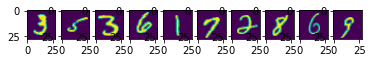

In [5]:
# 연습문제 1. (pyplot)
# x_train data 로부터 i 번째에서부터 시작하는 이미지를 10 개를 동시에 출력해 봅시다.
import matplotlib.pyplot as plt
def draw_10_images(i):
    images = x_train[i:i+10]   

    m=1
    for n in images:
      plt.subplot(1,10,m)
      plt.imshow(n)
      m +=1
    plt.show()

draw_10_images(10)

In [7]:
# 연습문제 2. x_train 에서 각각의 0, 1, 2, ..., 9 각각의 데이터셋은 몇개씩이나 있을까요?

# your code here 

a = np.array([x_train[:]])

for n in range (0,10):
  bool_idx = (a.count(n))
print(a[bool_idx])

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [ ]:
# 연습문제 3. 0~9 까지를 분류하는 multi-class classification 은 pytorch 를 이용해서 매우 손쉽게 풀어볼 예정이구요. 학습을 위해서 0,1 숫자 두개는 특별히 분류해서 numpy 를 이용해서 직접 logistic regression 을 돌려볼려고 합니다. 0,1 만 존재하는 x_train, y_train, x_test, y_test 를 만들어 보도록 합시다. 

# Hint
a = np.random.random(100)
a = a.reshape(100,1)   # rank-1 row array 에서 column array 로 변환
print(a)
mask = a < 0.4  #  a array 에서 0.4 보다 작은 원소만 뽑아서 mask array 를 만듬
print(mask)

c = a[mask].reshape(-1,1)  # rank-1 row array 에서 column array 로 변환
print(c.shape, len(c))
print(c)

# 위의 예제를 보시면 y_train 에서 0,1 을 뽑는 것 가능하겠죠?  y_train 에서 얻은 mask 를 이용해서 x_train 을 얻는 것은 조금 복잡합니다 :)

[[0.39949463]
 [0.57104585]
 [0.11813979]
 [0.58248025]
 [0.98503202]
 [0.49860191]
 [0.70230888]
 [0.35426071]
 [0.54187876]
 [0.17579485]
 [0.023658  ]
 [0.18227443]
 [0.668969  ]
 [0.23908667]
 [0.24040418]
 [0.19616157]
 [0.62582665]
 [0.62768353]
 [0.69302881]
 [0.22412938]
 [0.00879799]
 [0.71485885]
 [0.15154718]
 [0.08929483]
 [0.4818875 ]
 [0.44480853]
 [0.85633006]
 [0.55538329]
 [0.0650058 ]
 [0.22027169]
 [0.43980472]
 [0.43652175]
 [0.17556755]
 [0.28086103]
 [0.00597694]
 [0.89579567]
 [0.0503111 ]
 [0.88014431]
 [0.83608143]
 [0.16479212]
 [0.22803731]
 [0.41910477]
 [0.14900924]
 [0.50617716]
 [0.79308706]
 [0.64545133]
 [0.07794012]
 [0.14838132]
 [0.95854806]
 [0.65940312]
 [0.62837418]
 [0.4782861 ]
 [0.14046626]
 [0.59875937]
 [0.26272966]
 [0.04936476]
 [0.7588657 ]
 [0.07986957]
 [0.67621145]
 [0.85756915]
 [0.0945296 ]
 [0.46119419]
 [0.92241602]
 [0.55353428]
 [0.25635055]
 [0.3777432 ]
 [0.80332899]
 [0.61469494]
 [0.45062761]
 [0.40325044]
 [0.83621082]
 [0.23